In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Update the path based on the location of your file
file_path = '/content/drive/My Drive/ColabNotebooks/5qlearning/environment.py'

# Add the directory containing the file to sys.path
import sys
sys.path.append('/content/drive/My Drive/ColabNotebooks/5qlearning')
#sys.path.append('/usr/local/lib/python3.7/site-packages/')

!python3 --version
!pip install pybullet
!pip install gymnasium
!pip install urdfpy

Mounted at /content/drive
Python 3.10.12
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 14.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 15.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 688.9/688.9 kB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 38.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 858.3/858.3 kB 39.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 53.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for networkx: filename=networkx-2.2-py2.py3-none-any.whl size=1526911 sha256=01ee71b8e3dfae

Mounted at /content/drive
Python 3.10.12
{'None': [2.4697785406862622, 0.1, -99.59412441559999, -94.28943799999999], "[7, -1, '1000']": [0.1, 0.1, 0.1, 0.1], "[7, 0, '1111']": [0.1, -94.28943799999999, 0.13294864682037505, 2.4709112000595246], "[6, 0, '1110']": [0.0843071838065421, -99.89224779215671, 0.090562, 2.500734774483956], "[6, 1, '0011']": [-0.14629185844948522, 0.08198362366794254, -9.915712506138126, -9.942928331656015], "[6, 2, '0011']": [0.1, 0.09251050463847643, 0.1, 0.1], "[5, 1, '1110']": [0.956250150961783, 0.1, 0.1, 0.1], "[4, 2, '1111']": [0.1, 0.5656487932314292, 0.1, 0.1], "[4, 1, '1110']": [0.1, 0.1, 0.1, 0.4253334737518413], "[3, 1, '1110']": [0.09768069347663538, 0.27599049610164467, 0.1, 0.1], "[3, 2, '0010']": [0.1, 0.09096728176004559, 0.090562, 1.129765098227394], "[4, 2, '0001']": [4.352531927318947, 0.08198494908328001, -8.809557239744029, 0.08231373241028245], "[6, -1, '1000']": [0.1, 0.1, 0.1, 0.1], "[8, 0, '1101']": [0.1, 0.1, 0.1, 0.090562], "[7, 0, '1

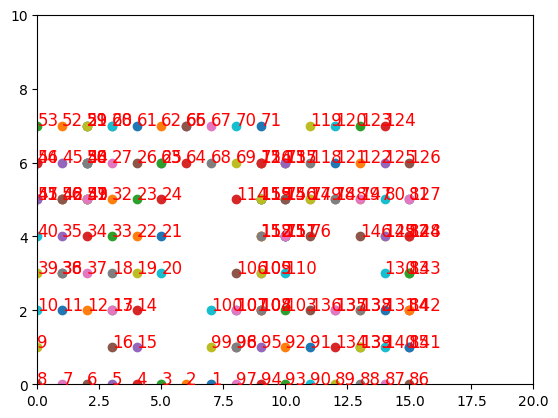

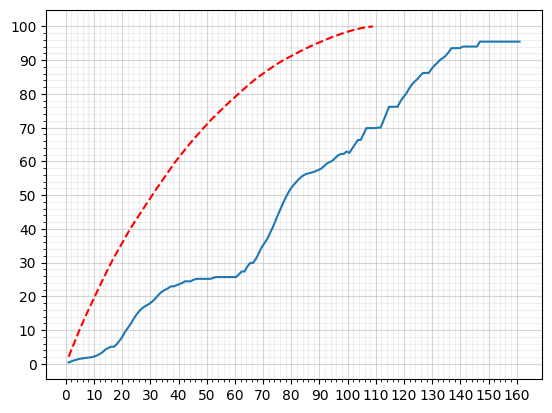

In [27]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Update the path based on the location of your file
file_path = '/content/drive/My Drive/ColabNotebooks/5qlearning/environment.py'

# Add the directory containing the file to sys.path
import sys
sys.path.append('/content/drive/My Drive/ColabNotebooks/5qlearning')
#sys.path.append('/usr/local/lib/python3.7/site-packages/')

!python3 --version
!pip install pybullet
!pip install gymnasium
!pip install urdfpy

import numpy as np
import random
import pybullet as p
from environmenttt import Env
from collections import defaultdict
import os
import matplotlib.pyplot as plt
import math
import pandas as pd



cwd = os.getcwd() # Get the current working directory (cwd)
files = os.listdir(cwd) # Get all the files in that directory

global lr
lr=0
global df
df=0
global eps
eps=0
global number_of_steps
number_of_steps = 1
global ij
ij=0

reward=0



class QLearningAgent:
    def __init__(self, actions):
        # actions = [0, 1, 2, 3]
        global lr
        global df
        global eps
        self.actions = actions
        self.learning_rate = lr #was 0.01
        self.discount_factor = df #was 0.9
        self.epsilon = eps# was 0.1
        #self.q_table = defaultdict(lambda: [0.0, 0.0, 0.0, 0.0])
        self.q_table =  ( {'None': [2.4697785406862622, 0.1, -99.59412441559999, -94.28943799999999], "[7, -1, '1000']": [0.1, 0.1, 0.1, 0.1], "[7, 0, '1111']": [0.1, -94.28943799999999, 0.13294864682037505, 2.4709112000595246], "[6, 0, '1110']": [0.0843071838065421, -99.89224779215671, 0.090562, 2.500734774483956], "[6, 1, '0011']": [-0.14629185844948522, 0.08198362366794254, -9.915712506138126, -9.942928331656015], "[6, 2, '0011']": [0.1, 0.09251050463847643, 0.1, 0.1], "[5, 1, '1110']": [0.956250150961783, 0.1, 0.1, 0.1], "[4, 2, '1111']": [0.1, 0.5656487932314292, 0.1, 0.1], "[4, 1, '1110']": [0.1, 0.1, 0.1, 0.4253334737518413], "[3, 1, '1110']": [0.09768069347663538, 0.27599049610164467, 0.1, 0.1], "[3, 2, '0010']": [0.1, 0.09096728176004559, 0.090562, 1.129765098227394], "[4, 2, '0001']": [4.352531927318947, 0.08198494908328001, -8.809557239744029, 0.08231373241028245], "[6, -1, '1000']": [0.1, 0.1, 0.1, 0.1], "[8, 0, '1101']": [0.1, 0.1, 0.1, 0.090562], "[7, 0, '1110']": [0.5271219276802603, 0.1, 0.1, 0.1], "[7, 1, '0011']": [6.748150551742307, 0.1, 0.1, 0.1], "[7, 2, '0011']": [0.1, 0.5179929583040995, 3.6432255183536504, 0.1], "[7, 0, '1101']": [-9.355811278606227, 0.1, 0.1, 0.090562], "[5, 0, '1110']": [-9.932074534566773, -94.28943799999999, 0.090562, 2.5689134523485118], "[5, 1, '0010']": [0.1, 0.08254517404, 0.090562, 0.1], "[6, 1, '0001']": [-8.719658061135519, 0.1, 0.1, 0.1], "[5, 1, '0011']": [0.1, 0.1, 0.1, 0.8594121793962131], "[3, 2, '0011']": [0.44406778457930696, 0.1, 5.412500461975163, 0.1], "[3, 0, '1111']": [0.1, 0.1, 0.1, 2.0492877961289344], "[2, 0, '1110']": [0.1, 0.1, 0.090562, 3.060622709130406], "[3, 0, '1101']": [0.1, -94.28943799999999, 0.1, 0.1], "[3, -1, '1000']": [0.1, 0.1, 0.1, 0.1], "[6, 0, '1100']": [-0.4616740648833435, -94.28943799999999, 0.06736132883614263, 0.022471857059249454], "[5, -1, '1000']": [0.1, 0.1, 0.1, 0.1], "[4, 0, '1110']": [0.1, -99.89224779215671, 0.090562, 2.6824461037014693], "[4, -1, '1000']": [0.1, 0.1, 0.1, 0.1], "[5, 0, '1100']": [-10.291238, -94.28943799999999, 0.03989417486161233, 0.08011873118600017], "[3, 0, '1110']": [0.09341709727157743, -94.28943799999999, 0.09065466316044712, 2.8456491776774335], "[3, 1, '0011']": [0.8128156021653038, 0.1, 0.1, -10.704501630009878], "[2, 1, '1110']": [0.1, 0.1, 0.090562, -1.7970379999999997], "[3, 3, '0011']": [0.1, 0.09681648256855009, 6.039921314961442, 0.1], "[4, 2, '1101']": [0.09871906674120101, 4.825487658231547, 0.1, 0.090562], "[2, 2, '1110']": [0.9300928142255229, 0.1, 0.1, 0.1], "[2, 3, '0010']": [0.1, 0.09063733457142543, 0.090562, 0.8712418087967446], "[4, 3, '0011']": [0.1, 0.09299079501059089, 5.0735309925219605, 0.1], "[5, 3, '1101']": [5.797438860713003, -9.347438, -0.853238, 0.08798051719582074], "[5, 4, '0011']": [0.1, 1.7758801956698886, 1.196526119270032, 5.42478031313772], "[4, 4, '0010']": [5.193938348135551, 0.090562, 0.090562, 0.1], "[4, 5, '0011']": [0.1, 1.169315739923026, 4.937405024472171, 0.1], "[4, 3, '0010']": [0.1, 0.09103133220101225, 0.1, 0.1], "[5, 5, '0001']": [4.469098934200107, 0.1, 0.1, 0.090562], "[4, 5, '0010']": [3.2650385232351624, 0.1, 0.090562, 0.1], "[5, 6, '0011']": [0.1, 3.2119809499056426, 0.9514404603421608, 4.097285631416135], "[4, 6, '0010']": [0.1, 0.4742144655752484, 0.090562, 3.840675152952431], "[5, 6, '0001']": [0.35369116745959284, 1.5828089566142645, 8.378174037940175, 0.1], "[5, 7, '0011']": [0.1, 0.3222492414082898, 0.1, 0.1], "[3, 6, '1110']": [3.709064331343926, 0.1, 0.090562, 0.1], "[4, 6, '0000']": [0.27170839039519956, 0.08201475844, 0.08630897443850341, 0.08203064443418738], "[3, 7, '0011']": [0.1, 2.231108359781748, 0.1, 3.713992779653905], "[2, 7, '1110']": [-9.185798210575532, 3.82099894836174, 0.1, 0.1], "[2, 8, '0011']": [0.1, 0.08655179554661138, -0.6378592764592971, 0.1], "[3, 8, '0001']": [0.1, 0.090562, -9.072851266846214, -9.347438], "[3, 7, '0001']": [-9.132059276459296, 0.09833691853946447, 7.086842068740613, 0.09081913030230152], "[2, 6, '1110']": [0.1, 3.8263984681205403, 2.2325864577684795, 0.1], "[2, 5, '1111']": [0.090562, 0.1, 3.7607893196579116, 0.1], "[2, 6, '0010']": [0.1, 0.1, 0.1, 1.2442935358954335], "[1, 6, '1110']": [0.1, 0.1, 0.1, 0.275510060392799], "[0, 6, '1110']": [0.09996980203937202, 0.1, 0.090562, -94.28943799999999], "[-1, 6, '0000']": [0.1, 0.1, 0.1, 0.1], "[3, 5, '1100']": [0.090562, 3.5248484932800306, 0.09003158440000002, 0.090562], "[4, 5, '0000']": [3.4319906787481744, 0.06927406095667205, -14.212316623709714, 0.0740165248073082], "[3, 6, '0000']": [0.08199631208314473, 0.08233537942244208, 0.08276889089828737, 0.07962466606998682], "[2, 5, '1110']": [0.2996553535799573, 0.1, 0.1, 0.1], "[3, 4, '1110']": [0.090562, 1.6542658177367697, 0.090562, 0.1], "[4, 4, '0000']": [0.3912303317978981, 0.07483194812537314, -6.7328468018941345, 0.07482639865273208], "[3, 5, '0000']": [0.0815809375759906, 0.07562488063178628, 0.07422990910366883, 0.0770612371697845], "[3, 3, '0010']": [0.4360761815709837, 0.21819042535281996, 0.43396523452825225, 1.057821110357436], "[3, 4, '0010']": [0.1, 0.1, 0.1, 3.2627557375797145], "[2, 4, '1110']": [0.090562, 0.1, 0.090562, 3.1346825879132685], "[2, 5, '0010']": [0.1, 0.090562, 0.090562, 0.8801352291834941], "[3, 4, '0000']": [0.07461639243493536, 0.07791551174995298, 0.07463691199123758, 0.0803119196660866], "[3, 1, '0001']": [0.1, 0.1, 0.3651487331537855, 0.1], "[4, 1, '0001']": [3.0324507032861283, 0.08115555658312672, -9.95628906104836, 0.08230642715589344], "[4, 0, '1100']": [0.1605667537088741, -94.28943799999999, 0.07434200454607269, 0.07318240657628246], "[3, 1, '0000']": [0.1, 0.0907042884546932, 0.1, 0.1], "[4, 1, '0011']": [0.090562, 0.09100237161105508, -9.95628906104836, 5.038377687890322], "[5, 1, '0001']": [0.1, 0.090562, 0.090562, 0.090562], "[1, 0, '1110']": [0.1, 0.1, 0.1, 3.328010964324113], "[0, 0, '1110']": [3.6478512346585448, -99.59412441559999, 0.07449524357898626, -94.28943799999999], "[0, -1, '1000']": [0.1, 0.1, 0.1, 0.1], "[-1, 0, '0000']": [0.1, 0.1, 0.1, 0.1], "[0, 1, '0011']": [3.959273726271019, 0.08141616918741813, -10.760650422741545, -94.28943799999999], "[1, 1, '0001']": [-0.853238, 0.09003158440000002, -0.853238, 0.08216493698832739], "[0, 1, '0010']": [0.090562, 0.30533306575501074, -0.861705371578952, -94.28943799999999], "[1, 0, '1100']": [-10.175169093714775, -94.2899684156, 0.067681530000104, 0.07267210157439344], "[2, 0, '1100']": [-1.6353982105755314, -94.28943799999999, 0.07348205693404257, 0.06816487555259303], "[1, -1, '1000']": [0.1, 0.1, 0.1, 0.1], "[0, 2, '0011']": [0.1, 0.1, 4.2484257028469266, -94.28943799999999], "[-1, 2, '0000']": [0.1, 0.1, 0.1, 0.1], "[1, 2, '1101']": [0.1, -10.175169093714775, 4.501042755516075, 0.09003158440000002], "[0, 2, '0010']": [0.07476604605396825, 0.19039151334939652, -0.853238, -94.28943799999999], "[-1, 1, '0000']": [0.1, 0.1, 0.1, 0.1], "[1, 2, '0001']": [0.1, 0.1, 0.1, 0.1], "[2, 2, '1101']": [0.1, 0.1, 4.6955816978987315, 0.1], "[3, 2, '1101']": [0.1, 0.1, 4.810141750147146, 0.1], "[3, 2, '0001']": [0.1, 0.090562, 0.1, 0.1], "[3, 1, '0010']": [5.344620099839518, 0.07424720958880004, 0.07439278998013263, -10.129598210575532], "[2, 1, '0010']": [0.1, 0.090562, 0.1, 0.1], "[5, 4, '0001']": [3.3977650584401533, 0.08692896502045284, -0.853238, 0.09841914477759454], "[3, 2, '1100']": [2.173287575481854, 1.6561697657121013, 2.2576903814796303, 0.1], "[4, 3, '0000']": [0.06799138744549582, -1.673901562330487, -6.574861036744722, 0.07275258386350814], "[0, 3, '0011']": [0.09266279353631723, 0.1, 0.359994349145477, 0.1], "[0, 4, '0011']": [0.1, 0.09065776040113584, 0.855835251055754, 0.1], "[1, 3, '0001']": [0.1, 0.1, 0.1, 0.090562], "[0, 3, '0010']": [3.634850542501641, 0.08187400745151709, 0.08121107819225142, -94.28943799999999], "[-1, 3, '0000']": [0.1, 0.1, 0.1, 0.1], "[3, 6, '1100']": [0.1, 0.1, 0.1, 2.2866601403783835], "[3, 2, '0000']": [5.938457862275912, 0.07441825895498785, -1.5274947488140223, 0.07429062696116637], "[2, 2, '1100']": [0.32349358112374615, 0.08201475844, 0.07517954854938456, -0.8622655965356718], "[6, 6, '1101']": [8.296026444183967, -4.7135177945955204, 0.1, 1.5965649104921686], "[5, 6, '0010']": [0.1, 0.1, 0.090562, 0.1], "[6, 7, '0011']": [-9.465482770118804, 4.280003351690583, 8.532311457836682, 0.94372765623429], "[6, 8, '0011']": [-9.347438, 0.09003158440000002, -9.347438, -9.347438], "[5, 7, '0010']": [-6.5541690035189, 0.1, 0.090562, 4.428258984380792], "[6, 7, '0001']": [0.1, 5.422612770610188, 8.478916897756548, 5.944109768446314], "[4, 7, '0000']": [-0.655044854908003, 0.24755415954250826, 0.09066414537887925, 0.18529519761704719], "[5, 6, '0000']": [0.08408663387910983, -1.041334699131348, 0.090562, 0.08268502677854539], "[5, 7, '0000']": [-0.4330049414073365, 0.08574546489555694, 0.08241941219582379, 1.720403289097606], "[6, 5, '1101']": [0.3764662095942244, -9.347438, -9.347438, 0.09003158440000002], "[5, 5, '0000']": [0.090562, 0.1, 0.1, 0.6572420145804314], "[7, 7, '1101']": [0.1, 8.648634411154305, 0.8396236485568067, 0.1], "[7, 6, '1101']": [0.09003158440000002, 0.1, 8.477746143754388, 0.09003158440000002], "[6, 6, '0001']": [5.825350510606566, 3.231257278313816, 0.090562, 1.7500224457957736], "[6, 6, '0000']": [0.1, -8.933060562873703, 0.090562, 0.090562], "[7, 7, '0001']": [-8.91087807231974, 0.090562, 0.1, 0.1], "[8, 6, '1101']": [8.210366430336448, 0.1, 0.1, 1.038801240858622], "[8, 7, '0001']": [-8.880982564274671, 0.1, 8.240733920369781, 0.1], "[8, 8, '0011']": [0.1, 0.090562, 0.5674308114084654, 2.21685925279722], "[9, 7, '1101']": [-8.870569188591533, 8.254805667089148, 0.1, 0.090562], "[9, 6, '1101']": [0.1, 0.1, 7.935706627964339, 1.1037549870565844], "[8, 6, '1100']": [0.1, 1.3605008804665355, 0.1, 0.090562], "[7, 6, '1100']": [0.08254517404, -17.714450560907636, 0.090562, 4.686443759396328], "[8, 5, '1111']": [0.1, 0.1, 2.3568167383992717, 0.1], "[10, 6, '1101']": [1.6605398785088792, 7.608158503785579, 0.1, 0.090562], "[10, 7, '0001']": [0.1, 5.076036114392906, 0.1, 0.090562], "[9, 7, '0000']": [-8.750402968363513, 0.08211122000375105, 0.6374440198306842, 0.08111302532595878], "[5, 8, '0011']": [0.1, 1.7753319155237084, 0.1, 0.1], "[1, 2, '1100']": [0.090562, -10.175169093714775, 0.08254517404, 0.07203211695870851], "[1, 2, '0000']": [0.1, 0.1, 0.1, 0.2317111720307247], "[1, 3, '0000']": [0.6247749832861608, 0.09003158440000002, 0.08443852744112045, 0.08815035579997493], "[2, 3, '0000']": [0.08186019092132822, 0.08187897890918079, 0.08155751370168988, 3.111694587533956], "[2, 4, '0010']": [0.090562, 0.1, 2.366226859401714, 0.1], "[10, 5, '1111']": [0.1, 7.03740557609087, 1.216337313529962, 0.1], "[10, 4, '1111']": [0.090562, 0.1, 6.403239192626121, 0.1], "[11, 4, '1101']": [5.7849690326652246, -9.85983800260061, -5.850051529485723, 0.090562], "[10, 4, '1110']": [0.1, 0.1, 0.1, 3.6236909624665623], "[9, 4, '1110']": [3.0359830284180376, 0.1, 0.1, 0.34963010837581326], "[9, 5, '0010']": [0.9256398906825614, 1.171873432108283, 0.090562, 1.962680555686519], "[10, 5, '0001']": [0.090562, 0.1, 0.1, 0.1], "[12, 4, '1101']": [0.09931625900937571, 0.1, 0.1, 0.09070014709477164], "[12, 5, '0011']": [0.1, 0.1, 0.1, 2.190555606660097], "[11, 5, '0000']": [0.3251323689238959, -0.056597544440375236, 0.3234230528708005, 0.8515685039854263], "[10, 5, '0010']": [0.1, 0.11289970492354612, 0.09360933051443251, 0.1], "[11, 6, '0001']": [5.151014680812595, 0.6943354415248248, 4.521476488425421, 0.7100252960101929], "[8, 7, '1101']": [-0.853238, 0.1, 0.1, 0.090562], "[7, 7, '1100']": [0.1, 7.299227958411858, 0.1, 0.1], "[11, 3, '1111']": [0.1, -1.7970379999999997, 0.1, 1.7607131886934428], "[11, 4, '0001']": [0.1, 0.1, 0.1, 2.1524927239131952], "[11, 5, '0001']": [0.1, 1.2395165837143631, 5.098575792452838, 0.090562], "[1, 4, '1110']": [0.1, 3.13068492361033, 0.1, 0.1], "[1, 3, '0011']": [0.1, 0.1, 3.177663921481817, 0.1], "[2, 4, '0000']": [0.07999853369572443, 0.100176897979845, 0.07497710671649632, 0.07436340531007422], "[1, 3, '0010']": [0.09094713319942058, 0.1, 0.090562, 3.4574361456056693], "[8, 7, '0000']": [0.08372684448600708, 0.08201475844, 0.0900589786189763, 0.08979410293483173], "[7, 7, '0000']": [-8.91087807231974, -19.8436566922484, 0.08246398371995287, 0.08201475844], "[7, 8, '0011']": [0.1, 0.090562, -8.880982564274671, 0.1], "[6, 7, '0000']": [-8.964523898596624, 0.08198494908328001, 0.21978836386450806, 0.08914168525258324], "[6, 6, '1100']": [0.090562, -4.018104719084257, -6.091344566392554, 4.962824491592392], "[7, 5, '1101']": [0.1, -9.347438, 0.1, -10.291238], "[7, 5, '1111']": [0.1, -9.165462686470038, 0.1, 0.1], "[7, 4, '1111']": [0.090562, -0.853238, 0.1, -1.7970379999999997], "[7, 5, '0011']": [0.1, 0.1, 1.2934301083758146, 0.1], "[8, 5, '1101']": [0.090562, 0.1, 1.320283515047568, -1.7970379999999997], "[7, 5, '0010']": [0.1, 0.1, 0.090562, 0.1], "[8, 6, '0001']": [0.1, 0.090562, 0.1, 0.1], "[9, 5, '1101']": [0.1, 2.2728432526995066, 0.1, 0.1], "[9, 4, '1111']": [0.1, 1.2024598741135373, 0.1, 0.1], "[9, 3, '1111']": [0.090562, -0.08745393862765072, 2.131478211457298, 0.1], "[9, 4, '0011']": [0.090562, 0.1, 0.1, 0.1], "[9, 5, '0001']": [0.1, 0.1, 1.2934301083758162, 0.1], "[10, 5, '1101']": [1.1177548088007125, 0.1, 0.1, 0.1], "[10, 6, '0011']": [0.1, 0.1, 0.1, 1.1406863555205513], "[9, 6, '0000']": [0.3260654516488337, 0.49253258995018234, 0.8539414877069, 0.4433689668260433], "[9, 7, '0011']": [0.1, 0.1, 0.1, 0.8396236485568067], "[9, 7, '0001']": [0.1, 0.09389915722354479, 1.3137040760173075, 0.090562], "[12, 5, '1101']": [0.1, 2.590123709621801, 4.479604019455437, 0.297286805582493], "[12, 5, '0001']": [4.8791824921991465, -0.7209240731718168, 0.1, 0.37687456964879307], "[10, 5, '0011']": [0.090562, 0.1, 0.1, 1.320283515047568], "[10, 6, '0001']": [4.718314600237458, 2.403018796759614, 5.654522160664304, 0.09669256925365503], "[9, 5, '1110']": [0.1, 2.253942984144606, 0.090562, 0.1], "[11, 7, '0011']": [0.020710580015890656, 0.1, 4.897937066140516, 0.9053433804865123], "[12, 7, '1101']": [0.1, 4.7030221179029805, 0.9346367451466593, 0.8035005142167568], "[12, 6, '0001']": [0.09789035072935251, 0.08899193255710863, 4.213452990101438, 0.689068450201745], "[12, 7, '0001']": [0.09110961461275559, 0.090562, 3.621056342227154, 0.1], "[11, 6, '0000']": [0.349903117509434, 0.8122280728419953, 0.1, 0.1], "[8, 8, '1101']": [0.1, 0.8396236485568067, 0.1, 0.1], "[8, 8, '0001']": [-9.347438, 0.08208973431237139, -0.37636918859153456, -0.853238], "[9, 8, '1101']": [0.1, 0.1, -0.3867825642746713, 0.1], "[10, 8, '1101']": [0.1, 1.7456917872972015, 0.1, 0.1], "[10, 7, '1111']": [0.1, 0.1, 0.1, 0.8563460613723484], "[9, 7, '1100']": [0.1, 0.1, 0.090562, 0.1], "[10, 7, '1101']": [0.1, 1.9835335234675355, 0.1, 0.1], "[10, 6, '1111']": [0.1, 0.1, 1.692891347122738, 0.1], "[11, 6, '1101']": [3.41679721394326, 0.1, 0.1, 0.1], "[11, 7, '0001']": [-0.4166780723197404, 0.1, 4.880187708579569, 0.1], "[11, 8, '0001']": [0.1, 0.1, -0.4623070726366253, 0.1], "[12, 8, '1101']": [0.1, 2.411947744830699, -0.5182890610483589, 0.1], "[13, 8, '1101']": [0.1, 0.6581412433823561, 0.1, 0.1], "[13, 7, '1111']": [0.1, 0.1, 0.5315095702393116, 0.1], "[14, 7, '1101']": [0.1, 3.485213217352362, 0.1, 0.090562], "[13, 7, '1110']": [-9.347438, 0.1, 0.1, 0.1], "[13, 8, '0001']": [-0.853238, 0.1, 0.1, 0.1], "[9, 2, '1111']": [0.090562, 0.1, 0.1, 0.1], "[9, 3, '0011']": [0.1, 0.1, 0.1, 5.099801000123484], "[8, 3, '1110']": [0.1, 0.8396236485568077, 0.1, 0.090562], "[8, 2, '1110']": [0.1, 0.1, 0.1, -8.646384321391833], "[7, 2, '1110']": [0.1, -9.347438, 0.090562, -9.347438], "[8, 2, '1100']": [0.1, 0.1, 0.090562, 0.1], "[9, 2, '1101']": [0.090562, 0.1, 0.1, 0.1], "[9, 3, '0001']": [0.1, 0.1, 2.2669951084694264, 0.1], "[10, 3, '1101']": [5.662373278399452, 0.090562, -5.598979208196111, 1.4328187552746219], "[10, 4, '0001']": [0.1, 0.15040776037311598, 0.1, 0.090562], "[9, 4, '0010']": [3.425858140207414, 0.3467437815191075, 0.3944527752268733, -9.40461737313146], "[8, 4, '0010']": [0.090562, 0.34024374465957263, 0.1, 0.1], "[8, 4, '1110']": [0.09380096179149852, 0.1, 0.1, 0.1], "[8, 5, '0011']": [0.1, 0.1, 1.320283515047568, 0.1], "[9, 5, '0000']": [1.611542082767015, 0.4110391640241819, 0.3660996070570748, 0.2813167403754577], "[8, 5, '0010']": [0.0977387745211937, -10.2422835707307, 0.090562, -9.165462686470038], "[9, 4, '1100']": [0.090562, 0.1, 0.1, 0.1], "[10, 5, '0000']": [0.323808745976201, 0.4147706196173464, 0.3599194144811396, 0.32512316240987676], "[8, 5, '1110']": [0.1306108546424688, -8.0746464889676, 1.5350415236257233, -9.165462686470038], "[7, 5, '1110']": [-0.853238, -9.165462686470038, 0.090562, -0.853238], "[7, 6, '0000']": [0.090562, 0.1, 0.1, 0.1], "[8, 6, '0000']": [0.08159888095707203, 0.4727209130506312, 0.08230723995193043, -9.289707713805123], "[8, 5, '0000']": [0.1, 0.1, 0.090562, 0.1], "[7, 8, '0010']": [-9.347438, 1.9005871127033873, 0.090562, -8.956507072636626], "[6, 8, '0010']": [0.1, 0.1, 0.1, 0.1], "[9, 8, '0001']": [-9.347438, 0.090562, 0.1, 0.1], "[9, 8, '0011']": [0.1, 0.1, 0.24146855528245242, 0.1], "[12, 6, '1101']": [0.090562, 0.1, 4.458010497722747, 0.090562], "[11, 6, '1100']": [0.1, 1.216337313529962, 0.1, 0.1], "[11, 5, '1111']": [0.23007001286109502, 0.1, 0.1, 0.1], "[9, 6, '1100']": [0.1, 0.1, 5.389270715077885, 0.1], "[10, 6, '0000']": [0.2908130890485858, 0.4027313068444736, 0.31971392299788887, 0.32760232734718975], "[12, 6, '0011']": [0.1, 0.1, 4.449024243287859, 0.1], "[13, 6, '1101']": [0.1, 4.060101777442386, 0.1, 0.1], "[13, 5, '1101']": [0.090562, 0.1, 3.9647533038529317, 0.1], "[13, 6, '0001']": [3.8146309847958766, 0.09003158440000002, 0.1, 0.090562], "[14, 5, '1101']": [0.1, 0.1, 3.5751953016417652, 0.090562], "[15, 5, '1101']": [0.1, 3.320254878344027, 0.1, 0.1], "[15, 4, '1111']": [0.1, 3.0358333688911645, 0.090562, 1.6679293177462688], "[15, 3, '1111']": [0.09003158440000002, 2.814875036153308, 0.090562, -8.742763906645163], "[15, 4, '0011']": [2.2670343894891576, 1.8745679439253073, -8.93061072594125, 3.643448473485722], "[15, 5, '0001']": [2.2488464388617633, 3.2791880543195546, -8.93061072594125, 1.5184260458116083], "[16, 5, '1101']": [0.1, -0.4364107259412501, -0.853238, 0.4854171820013722], "[16, 4, '1101']": [-0.8303427227978982, -0.49728710609586135, -9.347438, 0.09003158440000002], "[16, 3, '1101']": [-0.853238, -9.087867293206985, 0.1, 0.1], "[16, 4, '0001']": [-0.853238, 0.1, -0.853238, 0.090562], "[15, 4, '0010']": [0.1, 0.090562, -0.853238, 0.1], "[16, 5, '0001']": [-0.49728710609586146, -9.001393402829017, -9.347438, 0.090562], "[15, 5, '0000']": [0.11668672184370177, 0.1, 0.1, 0.1], "[15, 6, '0011']": [0.1, 0.1, -0.49728710609586146, 0.1], "[16, 6, '0001']": [0.1, 0.1, 0.1, 0.090562], "[15, 6, '0010']": [0.1, 0.1, -0.853238, 0.1], "[14, 3, '1110']": [0.8526298494604793, 2.859901481890074, 0.1, -7.953230679012568], "[14, 2, '1111']": [0.1, 0.1, 0.43642985652651345, -8.868869667456986], "[13, 2, '1110']": [0.1, 2.3206894068694055, 0.090562, 0.1], "[14, 2, '1101']": [-9.347438, 0.1, 0.1, 0.1], "[14, 3, '0010']": [0.8379144192020834, 0.1, 0.1, 0.1], "[14, 4, '0010']": [0.090562, 0.1, 0.090562, 1.4978871963114506], "[15, 4, '0001']": [0.1, 0.1, -0.4215322746991482, 1.3035168360925513], "[16, 6, '0011']": [0.1, -9.355454825959999, 0.1, 0.1], "[15, 2, '1111']": [0.090562, 2.720456202779026, 0.1, 0.9469903804044386], "[15, 3, '0011']": [0.090562, 0.090562, -0.49728710609586135, 1.4936974558835723], "[16, 2, '1101']": [-0.853238, -9.177244470009876, -0.853238, 0.090562], "[15, 2, '1110']": [0.1, 0.090562, 0.1, 0.5315095702393121], "[14, 2, '1110']": [0.1, 1.3048549059644536, 0.6125570060186043, 2.658537624362409], "[14, 1, '1111']": [0.1, 0.1, 1.9158638014071474, 0.1], "[15, 1, '1101']": [0.090562, 1.9080650303368853, 0.1, 0.1], "[15, 2, '0001']": [1.1308110973944658, 0.08118151036139781, -0.4643840492340525, -0.4403840156000012], "[15, 0, '1111']": [0.1, -94.28943799999999, 0.1, 2.9420032404043743], "[14, 0, '1110']": [0.090562, -94.28943799999999, 0.090562, 3.0969804114357538], "[15, 0, '1101']": [0.07300008744662714, -94.28943799999999, -0.7678154224303929, 0.0672886487032438], "[15, 1, '0001']": [0.9968549060027062, 0.06846463001208401, -0.6915982105755316, 0.07475456051410481], "[14, -1, '1000']": [0.1, 0.1, 0.1, 0.1], "[13, 5, '1100']": [0.090562, -17.921691185745928, 0.090562, 0.090562], "[13, 4, '1101']": [0.1, 0.1, 0.7986502738137506, 0.1], "[14, 4, '1101']": [0.090562, 0.1, 0.1, 0.1], "[14, 5, '0001']": [0.6952360933548376, 0.1, 0.1, 0.1], "[14, 6, '0001']": [0.09139448148702667, 2.3628110554274198, 3.1594384532156803, 0.09003158440000002], "[14, 7, '0011']": [0.1, 0.1, 0.4364298565265131, 0.1], "[15, 7, '1101']": [0.1, 0.1, -0.5796098350852172, 0.090562], "[14, 7, '0010']": [0.1, 0.1, 0.090562, 0.6284427602559706], "[16, 7, '1101']": [-18.623798210575533, -0.49728710609586146, -0.853238, 0.090562], "[15, 7, '1100']": [0.1, 0.5648527018452264, 0.1, 0.1], "[15, 6, '1101']": [0.1, 0.1, 0.1, 0.090562], "[14, 6, '0000']": [0.090562, 3.4923346879503336, 0.09098304162414136, 0.090562], "[13, 7, '0010']": [0.1, 0.1, 0.1, 0.7183419388644797], "[12, 7, '0010']": [0.1, 0.090562, 3.3984160634455822, 2.2985088220180065], "[12, 6, '0010']": [0.1, 0.090562, 0.1, 0.1], "[12, 5, '0000']": [0.14464988398515252, 0.1, 0.090562, 0.1], "[13, 5, '0000']": [0.08392440162217679, 0.1, 0.1, 0.7047075504830961], "[14, 1, '0010']": [0.090562, 0.1, 0.1, 1.126575159536372], "[14, 2, '0010']": [-0.5989163910622861, 0.07475456051410481, 0.4448628978244439, -9.347438], "[13, 1, '1110']": [0.1, 0.1, 0.090562, 0.1], "[14, 1, '0000']": [0.6598085051371, 0.06642903564696953, 0.8510444445240825, 0.066213290187365], "[13, 0, '1110']": [0.23400945120939998, -94.28943799999999, 0.090562, 3.231397159727107], "[14, 0, '1100']": [0.06805476267158317, -94.28943799999999, 0.06654840757979176, 0.06756928741019227], "[13, -1, '1000']": [0.1, 0.1, 0.1, 0.1], "[13, 1, '0010']": [0.4722859499625212, 0.08254517404, 0.090562, 0.8574236572512465], "[13, 2, '0010']": [0.1, 0.5183669889926263, 0.1, 0.1], "[12, 1, '1110']": [0.4900184412660764, 0.1, 0.1, 1.8212899265709956], "[12, 2, '0010']": [-8.48655953965784, 0.1, 0.45609889364079825, 1.4461012516144922], "[12, 3, '0011']": [0.1, 0.1, -0.31535723974402874, 0.1], "[12, 2, '0011']": [0.007640460342159719, 1.051303935352147, 1.2945433872705725, 0.1], "[11, 1, '1110']": [0.1, 0.1, 0.1, 1.822858466112858], "[10, 1, '1110']": [0.1, 3.1316723653171628, 0.090562, 0.5674308114084656], "[15, -1, '1000']": [0.1, 0.1, 0.1, 0.1], "[11, 1, '1100']": [-8.817575397427415, 0.5062126510981162, 0.1, 0.1], "[11, 2, '0011']": [-9.347438, 0.09039210317206448, 0.7183419388644804, -1.1272200313939829], "[10, 0, '1111']": [0.1, 0.1, 0.49392961620458165, 4.6807218962132895], "[9, 0, '1110']": [3.2432272799947293, -4.885847067047749, 0.279732537475511, 0.43015179154002325], "[9, 1, '0010']": [0.1, 0.7483699571799783, 0.09003158440000002, 3.0421976195959246], "[11, 5, '1101']": [0.1, 0.1, 0.1, 0.090562], "[10, 5, '1110']": [0.1, 0.1, 0.1, 1.320283515047568], "[15, 1, '1111']": [0.090562, 2.7691634089191215, 0.1, 0.1], "[15, 2, '0011']": [0.09003158440000002, 0.07898240430213814, 0.090562, 0.7211829157142293], "[13, 1, '0011']": [-9.43906659552394, 0.1, 0.1, 2.184210795602415], "[13, 2, '0011']": [0.1, 0.09113553532600654, 0.1, 0.1], "[10, 1, '0000']": [-5.152778912545427, 0.07431877138258997, 0.3494302944907012, 0.0735170334475937], "[9, -1, '1000']": [0.1, 0.1, 0.1, 0.1], "[14, 5, '0000']": [0.1, 0.090562, 0.1, 0.1], "[13, 4, '1110']": [0.6282979396836588, -0.11563883177173648, 0.090562, 0.090562], "[12, 5, '1100']": [0.2573623274552582, -5.47166495902645, 0.090562, 0.7758283777765304], "[12, 4, '1100']": [0.090562, -0.853238, 0.1, 0.1], "[11, 4, '1100']": [0.1, -5.673930469530853, -9.16763704630358, 0.1], "[13, 5, '1111']": [0.1, 0.1, 3.6255412069428883, 0.1], "[14, 4, '1110']": [0.1, 3.2146157347313027, 0.1, 1.0118217751274206], "[15, 2, '1101']": [0.1, 0.1, 0.35013270679301556, 0.1], "[16, 1, '1111']": [0.1, 0.1, 0.1, 0.3059407235407033], "[15, 1, '1110']": [0.090562, 0.1, 0.1, 0.1], "[15, 2, '0000']": [0.1, 0.1, 0.1, -8.16801224652007], "[14, 1, '1110']": [0.1, 0.1, 0.090562, 0.1], "[15, 1, '1100']": [0.1, 1.8064836481809874, 0.1, 0.1], "[12, 0, '1110']": [0.1, 0.1, 0.1, 3.3457005867689755], "[11, 0, '1110']": [3.4441104701578915, 0.1, 0.090562, 0.1], "[12, 0, '1100']": [0.061639419655037275, -94.2899684156, 0.06592845464931414, 0.08096661183735478], "[11, 1, '0011']": [0.1, 0.1, 0.1, 3.3127751812625346], "[10, 0, '1110']": [0.1, 0.1, 0.090562, 3.1875986871998965], "[11, 0, '1100']": [0.46025860498869325, -94.28943799999999, 0.07248444057048514, 0.07298262906247106], "[8, 1, '1110']": [0.1, 2.716178253668875, 0.1, 0.1], "[8, 0, '1100']": [2.5937535474686, 0.07427420553843281, 0.06857370121188389, 0.07380902761869296], "[7, 0, '1100']": [-5.168511193577455, -94.29016244694857, 0.07084683847079193, 0.06451272579743138], "[9, 0, '1100']": [0.07346097428129768, -94.28943799999999, 0.07212239779093953, 0.07330355525784021], "[8, 1, '0010']": [0.09814388587987762, 0.08254517404, 0.090562, 3.036295914461753], "[9, 1, '0000']": [-0.340778700508126, 0.07810021607524012, 0.06865310123758749, 1.2053005820929714], "[7, 1, '0010']": [-4.730881970581477, 0.1, 0.1, 2.999894426378152], "[10, 0, '1101']": [0.090562, 0.1, 0.5037822126290907, 0.08254517404], "[11, 0, '1101']": [0.1, 0.1, 0.3012878989285759, 0.1], "[13, 0, '1100']": [0.061487201289544886, -94.2899684156, 0.06191587667874274, 0.060073622116954245], "[13, 1, '0001']": [0.1, 0.05849762307459367, 1.0466162130391496, 0.1], "[8, 2, '0001']": [0.5558308289273184, 0.38641639244857817, 3.111089570891902, 0.24694183259900132], "[8, 3, '0011']": [0.1, 0.1, 5.576092387328185, 0.090562], "[9, 3, '1101']": [0.1, 0.6813605695512305, 5.1486262335164, 0.1], "[10, 4, '0010']": [0.1, 0.1, 0.1, 1.9932256881849095], "[9, 3, '1100']": [0.1, -0.08745393862765072, 3.783487883274296, 0.1], "[9, 2, '0001']": [0.09045502633983996, 0.5045969135899855, 2.6463393511353224, 0.09003158440000002], "[8, 2, '0000']": [0.090562, 0.08287382587292572, 4.954791618324308, -0.4440751584259466], "[8, 3, '0010']": [-6.92069018448553, 4.464361543036378, 0.44965238895202697, 0.090562], "[8, 4, '0011']": [0.1, 0.1, 0.16299612581094025, 0.1], "[9, 4, '0000']": [0.1, 1.3377639102837304, 0.090562, 0.1], "[10, 4, '0000']": [0.3586552353834685, 0.19784660305399382, 0.21343107666458128, 1.0669364642296812], "[7, 2, '0010']": [0.566863552628268, 0.1, 0.11656079456317114, -8.386078813293512], "[7, 3, '0011']": [0.1, 0.1, 0.17395480880071135, 0.1], "[8, 3, '0001']": [0.1, 0.1, 0.1, 0.090562], "[7, 3, '0010']": [0.090562, -9.347438, 0.090562, -8.486559539657838], "[6, 3, '1100']": [0.1, 0.1, 0.090562, 0.1], "[7, 3, '0000']": [0.1, 0.5164713328235112, 0.1, 0.1], "[10, 7, '0000']": [0.05372967776278337, 2.0190480541994305, 0.09082452499448461, 0.08254517404], "[10, 8, '0011']": [-9.347438, 0.8267222040730462, -8.91087807231974, -0.37636918859153456], "[9, 8, '0010']": [0.1, 0.1, 0.1, -0.38678256427467206], "[8, 8, '0010']": [-0.853238, 0.1, 0.1, 0.1], "[9, 1, '1110']": [0.1, 0.1, 0.090562, 0.1], "[10, 1, '1100']": [0.1, 0.1, 0.090562, 0.1], "[11, 0, '1111']": [0.1, 0.090562, 0.2904251981918121, 0.1], "[12, -1, '1000']": [0.1, 0.1, 0.1, 0.1], "[12, 1, '0000']": [1.9666619693904916, 0.061611432512148206, 0.13926305558876093, 0.2464320702396391], "[11, 1, '0000']": [-9.336132296097286, 0.06650319874955707, 1.8511295825399643, 0.07957287442264797], "[11, 3, '1101']": [0.09949125046745849, 0.1, 0.1, 0.1], "[8, 2, '0011']": [0.1, 0.09099585306353777, 0.1, 0.1], "[8, 2, '1101']": [0.1, 4.094501627205964, 0.1, 0.1], "[8, 1, '0001']": [0.1, 0.1, 0.1, 5.736969306818346], "[15, 1, '0011']": [0.1, 0.1, 0.1, 0.3651487331537858], "[13, 1, '0000']": [-0.09309187594195478, 0.06114404708028159, 0.10154728683754977, 0.779103730313004], "[13, 7, '0001']": [0.23846488285174416, 2.8690491218851477, 3.6050258485833706, 0.09003158440000002], "[13, 8, '0011']": [0.1, 0.1, -0.5786512668462143, -0.07685633978713602], "[14, 8, '1101']": [0.1, 0.1, -0.6378592764592969, 0.1], "[15, 8, '1101']": [-0.853238, 0.1, 0.1, 0.1], "[14, 8, '1100']": [0.1, 0.1, 0.1, 0.1], "[12, 7, '0000']": [-9.0587623071143, 0.10039058666755019, 0.1, 0.090562], "[12, 8, '0011']": [-9.347438, 0.09998816594197518, 0.8743807883682676, 0.1], "[11, 7, '0010']": [0.1, 0.1, 0.1, 1.1954601709300263], "[14, 5, '1100']": [0.1, 2.844673571899145, 0.090562, 0.1], "[13, 7, '1101']": [-8.651936141921592, 3.7782160357673433, 0.1, 0.1], "[12, 8, '0010']": [-9.347438, 0.090562, 0.1, -8.081149894774875], "[12, 7, '1100']": [0.1, 0.1, 0.1, 0.090562], "[11, 8, '0000']": [-9.347438, 0.1, 0.1, 0.1], "[11, 8, '0010']": [0.1, 0.8259614264164747, 0.1, 0.1], "[8, 1, '0000']": [0.08204119811985333, 0.07406961145475308, 0.0751685669852554, -13.956266649329052], "[6, 1, '0010']": [-9.663458061135518, 0.08254517404, 0.090562, 0.8517336421081326], "[14, 7, '0001']": [0.1, 0.1, 0.6488975803306362, 0.090562], "[13, 7, '0000']": [-9.347438, 0.090562, 0.1, 0.090562], "[12, 6, '0000']": [0.1, 0.1, 0.09764817274951587, 0.4287494168784194], "[16, 8, '0011']": [0.1, 0.1, 0.1, -9.132059276459296], "[15, 8, '0010']": [0.1, 0.1, 0.1, 0.1], "[11, 8, '0011']": [-9.347438, 4.319663518536998, -0.4623070726366253, 0.1], "[13, 6, '0000']": [0.090562, 0.09003158440000002, 0.090562, 0.09096527576953753], "[15, 6, '0001']": [0.42742379015462423, 2.951491389163425, -0.5308546414584489, 0.09003158440000002], "[16, 6, '1101']": [-9.087867293206985, -0.43641072594124963, -0.853238, 0.090562], "[16, 7, '0011']": [0.1, 0.1, 0.1, 0.1], "[15, 7, '0001']": [-9.132059276459296, 0.08872207656837389, -0.5936672932069847, 0.09000177504328001], "[15, 8, '0011']": [0.1, 0.1, 0.1, -9.072851266846214], "[14, 8, '0010']": [0.1, 0.1, -0.853238, 0.1], "[15, 8, '0001']": [0.1, 0.1, 0.1, 0.1], "[13, 7, '0011']": [0.1, 0.1, 0.1, 3.7975901365232456], "[14, 7, '0000']": [0.3651487331537857, 0.090562, 0.082094628421048, 0.1], "[15, 6, '0000']": [0.1, 3.348212220165738, -0.853238, 0.09793618932151404], "[12, 1, '1100']": [0.1, 0.1, 0.1, 0.279732537475511], "[11, -1, '1000']": [0.1, 0.1, 0.1, 0.1], "[16, 1, '1101']": [0.1, 0.1, 0.1, 0.090562], "[15, 1, '0000']": [0.1, 0.08254517404, 0.1, 0.1], "[16, 0, '1101']": [0.1, -94.28943799999999, 0.1, 0.1], "[16, -1, '1000']": [0.1, 0.1, 0.1, 0.1], "[9, 3, '0000']": [0.37584966613695164, 0.090562, 0.1, 0.09154857565319002], "[10, 2, '0001']": [-1.7970379999999997, 0.08884636431934337, 0.1, 2.033206989209697], "[9, 2, '0000']": [2.238402238928515, 0.1, 0.1, 0.090562], "[10, 0, '1100']": [0.07388616066281443, 0.07427420553843281, 2.9773456914498735, 0.07340530642598558], "[11, 4, '0000']": [4.556546222272587, -9.212479211173155, 0.09264998763773878, 0.1], "[10, 2, '0011']": [0.1, 0.090562, 0.1, 1.0610348004495345], "[15, 3, '0001']": [1.0515955764441636, 0.8866699002993832, -0.49728710609586135, 0.1], "[15, 4, '0000']": [1.9722080204569088, 0.1, 0.1, 0.1], "[13, 3, '1110']": [0.090562, 0.1, 0.1, 0.05711810799473005], "[13, 4, '0010']": [0.1443760107788025, 0.1, 0.090562, -0.8035449051854011], "[14, 4, '0000']": [0.1, 0.1, 0.5352571026318673, 0.090562], "[11, 7, '0000']": [0.1, 0.35989738616608613, 0.1, 0.09536629065995914], "[8, 3, '0000']": [0.1, 1.9705096713483536, 0.1, 0.1], "[6, 2, '0010']": [0.1, 0.1, 0.1, 0.1], "[7, 1, '0000']": [-10.291238, 0.39401573060618045, 0.1, 0.1], "[4, 1, '0010']": [0.1, 0.1, 0.1, 0.30594072354070295], "[3, 0, '1100']": [0.07038829659029262, -94.28943799999999, 0.07415528469872172, 0.07427253025258515], "[4, 3, '0001']": [0.09281933889054217, 0.08254517404, 5.999177474280572, 0.09895866962709847], "[4, 1, '0000']": [0.090562, 0.07525854160695619, 0.08227725908740265, 4.562845762616913], "[5, 2, '0001']": [1.075039466733425, -18.785438, -8.719658061135519, -0.40332129137415407], "[3, 3, '0000']": [0.07725159267298165, 0.07601507684651745, 0.07098870229365718, 0.0771893194186137], "[4, 4, '0011']": [0.1, 0.1, 0.1, 1.275927144344178], "[4, 4, '0001']": [0.1, 0.09066741665800568, 0.1, 0.09057332102414761], "[1, 4, '0010']": [0.0906040705324481, 0.09638299363437407, 0.090562, 0.309454814693113], "[1, 5, '0011']": [0.1, 0.09179238385010662, 0.1, 0.29620474668740515], "[0, 5, '1110']": [0.1, 0.6270301620842199, 0.1, 0.1], "[0, 4, '1110']": [0.090562, 0.3803749512703211, 0.090562, -94.28943799999999], "[0, 5, '0010']": [0.08240647822240987, 0.08210697460137145, 0.9338204318627739, -94.28943799999999], "[1, 4, '0000']": [3.6225751746349304, 0.08201475844, 0.08155549077098966, 0.07621941364613719], "[-1, 4, '0000']": [0.1, 0.1, 0.1, 0.1], "[3, 5, '0011']": [0.1, 0.1, 0.8379144192020834, 0.1], "[4, 5, '0001']": [0.6952360933548368, 0.090562, 0.1, 0.090562], "[3, 5, '0010']": [0.1, 0.1, 0.1, 0.5073892740587508], "[1, 5, '0010']": [0.0908090664603248, 0.1, 0.1, 2.7461323960365247], "[1, 6, '0011']": [0.2769522950407299, 0.1, 0.1, 0.1], "[1, 7, '0011']": [0.1, 0.1, 0.35013270679301545, 0.1], "[2, 7, '1101']": [0.1, 0.1, 0.43642985652651256, 0.1], "[3, 7, '1101']": [0.1, 0.1, 0.1, 0.090562], "[2, 7, '1100']": [0.1, 0.44651289390413895, 0.1, 0.1], "[2, 6, '0001']": [0.1, 0.090562, 0.5648527018452256, 0.1], "[2, 5, '0000']": [1.2040388357653384, 0.07582245631165677, 0.07721292997279185, 0.07860421198583113], "[1, 6, '0010']": [0.1, 0.1, 0.090562, 1.0816357117732769], "[3, 6, '0001']": [0.090562, 0.090562, 0.1, 0.1], "[0, 7, '0010']": [-9.267692617823938, 0.764217922250679, 0.07404239389622022, -94.28943799999999], "[0, 8, '0011']": [-0.853238, 0.1, -0.7371690937147751, 0.1], "[1, 8, '0001']": [0.1, 0.090562, 0.1, 0.1], "[1, 7, '0000']": [-9.231369093714775, 0.1229252791224645, 0.08153272817848034, 0.0815903004464881], "[2, 7, '0000']": [-9.185798210575532, 0.08165019309060863, 6.378432260389407, 0.0747292398503197], "[1, 6, '0000']": [0.08204062939674439, 0.08357234706727032, 0.07413913782057789, 0.08224019942631194], "[2, 6, '0000']": [5.480436296605072, 0.07949717762108777, 0.07853962876343246, 0.07721411051401816], "[0, 4, '0010']": [3.7965697898368638, 0.08199062453944726, 0.07840430426685205, -94.28943799999999], "[1, 5, '0000']": [0.08247122409591257, 0.08178646154130292, 4.06566602144145, 0.08201475844], "[4, 6, '0001']": [0.28805692124780874, 0.1, 0.1, 0.1], "[4, 7, '0001']": [-9.072851266846214, 0.08269749525970779, 7.35527393810028, 0.090562], "[0, 5, '0011']": [0.09059233180879539, 0.1, 3.9762371022676346, 0.1], "[0, 6, '0011']": [0.21862183779502684, 0.09160207795029247, 0.1, 0.1], "[0, 7, '0011']": [0.1, 0.1, 0.2785440791652975, 0.1], "[1, 7, '1100']": [0.1, 0.1, 0.1, 0.090562], "[-1, 7, '0000']": [0.1, 0.1, 0.1, 0.1], "[0, 6, '0010']": [0.07453110257641964, 0.9950724762382894, 0.08202806711671373, -94.28943799999999], "[1, 8, '0011']": [0.1, 0.08254517404, -0.6915982105755316, 0.1], "[-1, 5, '0000']": [0.1, 0.1, 0.1, 0.1], "[1, 7, '0010']": [-9.231369093714775, 0.0985732432989527, 0.1, 0.8234824231316641], "[2, 8, '0001']": [0.1, 0.1, -9.132059276459296, 0.1], "[4, 8, '1101']": [0.1, 0.1, 0.1, 0.1], "[2, 8, '0010']": [-0.853238, 0.1, -0.853238, -0.7371690937147751], "[14, 3, '1111']": [0.1, 0.1, 0.1, -0.11563883177173648], "[13, 6, '0011']": [3.802848917675329, 0.1, 0.1, 0.1], "[12, 7, '1110']": [0.1, 0.1, 3.38012754297792, 0.1], "[5, 1, '0000']": [-1.7863900735860825, 0.0677893812068518, 0.08236314045799849, 0.5061088356643576], "[6, 2, '0000']": [-10.291238, 0.08440722848232887, -9.347438, -0.853238], "[5, 2, '0000']": [-9.020673042045788, 0.1, -9.347438, 0.1], "[6, 1, '0000']": [-0.7947776030309245, 0.024290085277609424, -9.355454825959999, 0.37200000121408294], "[4, 2, '0000']": [0.07905156003448288, 0.0859822548797998, -9.347438, 0.07482126538863137], "[1, 4, '0001']": [2.405498656995325, 0.3607304807312282, 0.1, 0.1], "[2, 5, '1100']": [0.1, 0.6724101472345855, 0.1, 0.1], "[4, 8, '0011']": [-9.347438, 0.090562, 0.1, -0.6378592764592971], "[3, 8, '0010']": [0.1, 0.1, 0.1, -0.6915982105755316], "[3, 8, '0000']": [-0.853238, 0.090562, 0.1, 0.1], "[3, 7, '0000']": [-9.132059276459296, 0.08578919258770183, 0.16882309215999683, 0.09003158440000002], "[5, 8, '0001']": [-0.853238, 0.1, -0.46230707263662474, 0.1], "[6, 8, '0001']": [0.1, 0.1, 0.1, -0.853238], "[5, 8, '0000']": [0.1, 0.1, 0.1, -0.853238], "[4, 8, '0000']": [0.1, 0.10268909659465048, 0.1, 0.1], "[2, 7, '0010']": [0.1, 0.1, 0.090562, 0.9386215549748398], "[3, 8, '0011']": [0.1, 0.1, 0.1, -0.6915982105755316], "[1, 8, '1110']": [0.1, 0.2769522950407299, 0.1, 0.1], "[1, 7, '1110']": [0.1, 0.7467866132344734, 0.1, 0.1], "[5, 7, '0001']": [0.1, 7.539806463153522, 0.1, 0.1], "[14, 8, '0011']": [-9.347438, 0.1, 0.1, -0.5182890610483589], "[13, 8, '0010']": [0.1, 0.090562, -9.347438, 0.1], "[14, 8, '0001']": [0.1, 0.1, 0.1, 0.1], "[13, 2, '0000']": [0.1, 0.9647188048420966, 0.1, 0.6421983524293827], "[10, 2, '0010']": [-0.853238, 2.932435459470807, 0.1, 0.1], "[10, 3, '0001']": [2.416284987385083, 0.1, 0.1, 0.1], "[9, 2, '0010']": [0.1, 0.3569057867325224, 0.1, 0.1], "[11, 1, '0001']": [-8.01813320183471, 0.09680308011942514, 0.5029328298811964, 0.0884668985317105], "[12, 2, '1101']": [0.1, 0.1, -18.24755723974403, 0.1], "[13, 2, '1101']": [0.1, 2.1887067872901484, 0.1, 0.1], "[11, 2, '0010']": [0.1, 0.2422083104986379, 0.1, 0.1], "[12, 2, '0000']": [0.1, 0.2834933650283514, 0.8682505528999457, 0.6060060297688024], "[12, 1, '0001']": [0.1, 0.1, 0.65073357586713, 0.09515610872672732], "[11, 2, '0000']": [0.1, 0.08169756561622736, 0.7814336552646219, 0.090562], "[10, 2, '0000']": [0.1, 0.07530986358453505, 0.1, 0.1], "[14, 2, '0000']": [0.1, 0.6393089095923501, 0.1, 0.1]})




        ##################################################
        global qarr
        qarr=self.q_table

    # update q function with sample <s, a, r, s'>
    def learn(self, state, action, reward, next_state):
        current_q = self.q_table[state][action]
        #print(state)
        if state!="None":
          global g
          global ij
          g=plt.figure(2)
          ij=ij+1
          #xx=int(state[1])
          #yy=int(state[4])
          if state[3]==",":
            xx=int(str(state[1]+state[2]))
            if state[6]==",":
              yy=int(state[5])
            else:
              yy=int(str(state[5]+state[6]))

          else:
            xx=int(state[1])
            if state[5]==",":
              yy=int(state[4])
            else:
              yy=int(str(state[4]+state[5]))


          plt.text(xx, yy, ij, color="red", fontsize=12)
          plt.axis([0, 20, 0, 10])
          plt.plot(xx, yy, marker = 'o')
          print(xx, yy)


        # using Bellman Optimality Equation to update q function
        new_q = reward + self.discount_factor * max(self.q_table[next_state])
        self.q_table[state][action] += self.learning_rate * (new_q - current_q)
        global qarr
        qarr=self.q_table
        #print(self.q_table)

    # get action for the state according to the q function table
    # agent pick action of epsilon-greedy policy
    def get_action(self, state):
        #self.epsilon=self.epsilon*0.99995
        if np.random.rand() < self.epsilon:
            # take random action
            action = np.random.choice(self.actions)
        else:
            # take action according to the q function table
            state_action = self.q_table[state]
            action = self.arg_max(state_action)
        return action

    @staticmethod
    def arg_max(state_action):
        max_index_list = []
        max_value = state_action[0]
        for index, value in enumerate(state_action):
            if value > max_value:
                max_index_list.clear()
                max_value = value
                max_index_list.append(index)
            elif value == max_value:
                max_index_list.append(index)
        return random.choice(max_index_list)

    def q_table(self):
        print(self.q_table)



if __name__ == "__main__":
    env = Env()
    agent = QLearningAgent(actions=list(range(env.n_actions)))

    global qarr
    print(qarr)

    episode_plot=[]
    reward_sum_plot=[]
    trial_plot=[]

    for episode in range(number_of_steps):
        state = env.reset()



        #global number_of_steps######################################
        n=160
        local_reward_plot=[]
        for trial in range(n):
            env.render()

            # take action and proceed one step in the environment
            action = agent.get_action(str(state))
            next_state, reward, done, reward_sum = env.step(action)

            # with sample <s,a,r,s'>, agent learns new q function
            agent.learn(str(state), action, reward, str(next_state))

            state = next_state
            #env.print_value_all(agent.q_table)

            local_reward_plot = np.concatenate((local_reward_plot, [reward_sum]))

            if trial==n-1:
                done=True

            # if episode ends, then break
            if done:

                print("episode:", episode, "   trials completed:", trial, "    reward:", reward_sum/0.6273, "%")

                episode_plot=np.concatenate((episode_plot, [episode]))
                reward_sum_plot = np.concatenate((reward_sum_plot, [reward_sum]))
                trial_plot = np.concatenate((trial_plot, [trial]))


                break
global g
g.show()

f=plt.figure(3)
#plt.plot(np.linspace(1, n+1, n), local_reward_plot/0.6273)

ax = f.add_subplot(1, 1, 1)

ax.set_xticks(np.arange(0, 161, 10))
ax.set_xticks(np.arange(0, 161, 2), minor=True)
ax.set_yticks(np.arange(0, 101, 10))
ax.set_yticks(np.arange(0, 101, 2), minor=True)

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)

plt.plot(np.linspace(1, n+1, n), local_reward_plot/0.6273)

data = pd.read_csv('/content/drive/My Drive/ColabNotebooks/5qlearning/max_theoretical.csv')

plt.plot(np.linspace(1, 109, 110), data.iloc[0], 'r--')

f.show()





In [ ]:
import numpy as np
array=np.ones((5, 10))
print(array)
#array=[[1, 2, 3],[4, 5, 6]]
array[2, 0]=0
print(array)
print(array[2][0])

In [ ]:
import time
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt



def prob(upper, lower):
    cdf_upper_limit = norm(loc = 0 , scale = 1).cdf(upper)
    cdf_lower_limit = norm(loc = 0 , scale = 1).cdf(lower)

    p = cdf_upper_limit - cdf_lower_limit
    return p

def probability_grid(x, y, sigmas_covered):
    arr = np.zeros((x, y))#the plus one is to pad the array with zeros
    sum=0
    for i in range(x):
        for j in range(y):
            u_x = -sigmas_covered+(2*(sigmas_covered)/x)*(i+1)
            l_x = -sigmas_covered+(2*(sigmas_covered)/x)*(i)
            prob_x = prob(u_x, l_x)

            u_y = -sigmas_covered+(2*(sigmas_covered)/y)*(j+1)
            l_y = -sigmas_covered+(2*(sigmas_covered)/y)*(j)
            prob_y = prob(u_y, l_y)

            p_box = prob_x*prob_y
            sum = sum + p_box
            arr[i, j] = p_box
    return arr, sum

reward=47.73829023695552

grid_dx=10
grid_dy=19

g, sum = probability_grid(grid_dx, grid_dy, 2)

#print(g)

unreachable =[[11, 2], [11, 3], [12, 2], [12, 3], [12, 4], [13, 2], [13, 3], [13, 4], [14, 2], [6, 5], [6, 4], [6, 3], [6, 2], [6, 1], [5, 1], [7, 5], [7, 4], [7, 3], [7, 2], [7, 1]]

for i in unreachable:
  #print(i)
  g[i[1], i[0]]=0

tot=0

for i in range(17):
  for j in range(8):
    tot=tot+g[j, i]

print(tot)
print(reward/tot, "% covered")

#x<0 or y<0 or x>17 or y>8

0.630941862959852
75.66194769991542 % covered
